# Libraries

In [2198]:
#Libraries
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pandas as pd
import glob
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.utils import resample

# Data Import 

In [1773]:
# Specify the folder path where CSV files are stored
folder_path = 'data/'

# Use glob to find all CSV files in the specified folder
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Use a list comprehension to read each CSV file into a DataFrame and ensure 'Date' is string
df_list = []
for file in all_files:
    try:
        # Read each CSV and convert 'Date' to string format
        buli_df = pd.read_csv(file, encoding='ISO-8859-1', dtype={'Date': str})
        df_list.append(buli_df)
    except pd.errors.ParserError as e:
        print(f"ParserError parsing {file}: {e}")
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError in {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
buli_df = pd.concat(df_list, ignore_index=True)

# Standardize and parse the 'Date' column
buli_df['Date'] = buli_df['Date'].str.strip()  # Remove extra whitespace
buli_df['Date'] = buli_df['Date'].replace(r'[/-]', '-', regex=True)  # Replace separators with '-'

# Attempt to parse dates as `dayfirst` and handle both `dd/mm/yyyy` and `dd/mm/yy`
buli_df['Date'] = buli_df['Date'].apply(lambda x: re.sub(r'(\d{2}/\d{2}/)(\d{2})$', r'\120\2', x))
buli_df['Date'] = pd.to_datetime(buli_df['Date'], dayfirst=True, errors='coerce')

# Check for any remaining NaT values in 'Date' after parsing
missing_dates = buli_df[buli_df['Date'].isna()]
if not missing_dates.empty:
    print("Warning: Some dates could not be parsed after concatenation.")
    print(missing_dates)

# Display the combined DataFrame
print("Final combined DataFrame with parsed dates:")
buli_df.shape

Final combined DataFrame with parsed dates:


/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_75926/3209581218.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  buli_df['Date'] = pd.to_datetime(buli_df['Date'], dayfirst=True, errors='coerce')


(5580, 168)

### Importing Betting odds

In [1982]:
# Specify the folder path where CSV files are stored
folder_path = 'data/'

# Use glob to find all CSV files in the specified folder
all_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Use a list comprehension to read each CSV file into a DataFrame and ensure 'Date' is string
df_list = []
for file in all_files:
    try:
        # Read each CSV and convert 'Date' to string format
        buli_df = pd.read_csv(file, encoding='ISO-8859-1', dtype={'Date': str})
        df_list.append(buli_df)
    except pd.errors.ParserError as e:
        print(f"ParserError parsing {file}: {e}")
    except UnicodeDecodeError as e:
        print(f"UnicodeDecodeError in {file}: {e}")

# Concatenate all DataFrames in the list into a single DataFrame
buli_df_bet = pd.concat(df_list, ignore_index=True)

# Standardize and parse the 'Date' column
buli_df_bet['Date'] = buli_df_bet['Date'].str.strip()  # Remove extra whitespace
buli_df_bet['Date'] = buli_df_bet['Date'].replace(r'[/-]', '-', regex=True)  # Replace separators with '-'

# Attempt to parse dates as `dayfirst` and handle both `dd/mm/yyyy` and `dd/mm/yy`
buli_df_bet['Date'] = buli_df_bet['Date'].apply(lambda x: re.sub(r'(\d{2}/\d{2}/)(\d{2})$', r'\120\2', x))
buli_df_bet['Date'] = pd.to_datetime(buli_df_bet['Date'], dayfirst=True, errors='coerce')

# Check for any remaining NaT values in 'Date' after parsing
missing_dates = buli_df_bet[buli_df_bet['Date'].isna()]
if not missing_dates.empty:
    print("Warning: Some dates could not be parsed after concatenation.")
    print(missing_dates)

# Display the combined DataFrame
print("Final combined DataFrame with parsed dates:")
buli_df_bet

Final combined DataFrame with parsed dates:


/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_75926/2753913843.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  buli_df_bet['Date'] = pd.to_datetime(buli_df_bet['Date'], dayfirst=True, errors='coerce')


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BFECAHA,IWCH,IWCD,IWCA,VCCH,VCCD,VCCA,Unnamed: 70,Unnamed: 71,Unnamed: 72
0,D1,2015-08-14,Bayern Munich,Hamburg,5,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D1,2015-08-15,Augsburg,Hertha,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1,2015-08-15,Darmstadt,Hannover,2,2,D,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D1,2015-08-15,Dortmund,M'gladbach,4,0,H,3,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1,2015-08-15,Leverkusen,Hoffenheim,2,1,H,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,D1,2013-05-18,Hamburg,Leverkusen,0,1,A,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5576,D1,2013-05-18,Hannover,Fortuna Dusseldorf,3,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5577,D1,2013-05-18,M'gladbach,Bayern Munich,3,4,A,3,2,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5578,D1,2013-05-18,Nurnberg,Werder Bremen,3,2,H,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Creating new Data Frame with caluclated Features

In [1263]:
#formatting the date column to datetime format and sorting by date
#buli_df['Date'] = pd.to_datetime(buli_df['Date'])

buli_df = buli_df.sort_values(['Date']).reset_index(drop=True)

In [620]:
#checking for null values
buli_df.isna().sum()

Div              72
Date              0
HomeTeam          0
AwayTeam          0
FTHG              0
               ... 
VCCD           4050
VCCA           4050
Unnamed: 70    5580
Unnamed: 71    5580
Unnamed: 72    5580
Length: 168, dtype: int64

### Data Frame incl. Betting Odds

In [ ]:
import pandas as pd

# Subset of initial DataFrame columns
buli_df_red = buli_df_bet[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR',
                       'B365H', 'B365D', 'B365A', 'BFH', 'BFD', 'BFA', 'BSH', 'BSD', 'BSA', 'BWH', 'BWD', 'BWA']]

df = buli_df_red

# Define dictionaries for stats and betting odds columns
stats = {
    'goals': {'scored': ('FTHG', 'FTAG'), 'conceded': ('FTAG', 'FTHG')},
    'shots': {'taken': ('HS', 'AS'), 'conceded': ('AS', 'HS')},
    'shots_on_target': {'taken': ('HST', 'AST'), 'conceded': ('AST', 'HST')},
    'fouls': {'fouls': ('HF', 'AF'), 'fouled': ('AF', 'HF')},
    'corners': {'taken': ('HC', 'AC'), 'conceded': ('AC', 'HC')},
    'yellow_cards': {'received': ('HY', 'AY'), 'provoked': ('AY', 'HY')},
    'red_cards': {'received': ('HR', 'AR'), 'provoked': ('AR', 'HR')},
}

odds_columns = {
    'home_win': ['B365H', 'BFH', 'BSH', 'BWH'],
    'home_draw': ['B365D', 'BFD', 'BSD', 'BWD'],
    'away_draw': ['B365D', 'BFD', 'BSD', 'BWD'],
    'away_win': ['B365A', 'BFA', 'BSA', 'BWA']
}

# Define `npm` for the number of past matches to consider
npm = 7

# Initialize an empty list to accumulate each row's data as a dictionary
rows_list = []

# Iterate through each row to calculate rolling stats based on home and away perspectives
for index, row in df.iterrows():
    team_h = row['HomeTeam']
    team_a = row['AwayTeam']
    date = row['Date']
    
    # Get the past `npm` games for the home and away team
    past_matches_home = df[((df['HomeTeam'] == team_h) | (df['AwayTeam'] == team_h)) & (df['Date'] < date)].tail(npm)
    past_matches_away = df[((df['HomeTeam'] == team_a) | (df['AwayTeam'] == team_a)) & (df['Date'] < date)].tail(npm)

    # Initialize a dictionary to store the calculated stats for each row
    row_stats = {
        'Date': date,
        'HomeTeam': team_h,
        'AwayTeam': team_a,
        'FTR': row['FTR'],
        'FTHG': row['FTHG'],
        'FTAG': row['FTAG'],
    }
    
    # Calculate stats for the home team based on whether they played home or away in past matches
    for stat, subcategories in stats.items():
        for subcategory, columns in subcategories.items():
            home_column, away_column = columns
            stat_home_as_home = past_matches_home.loc[past_matches_home['HomeTeam'] == team_h, home_column].sum()
            stat_home_as_away = past_matches_home.loc[past_matches_home['AwayTeam'] == team_h, away_column].sum()
            row_stats[f'p_home_{stat}_{subcategory}_last_{npm}'] = stat_home_as_home + stat_home_as_away
            
    # Calculate stats for the away team based on whether they played home or away in past matches
    for stat, subcategories in stats.items():
        for subcategory, columns in subcategories.items():
            home_column, away_column = columns
            stat_away_as_home = past_matches_away.loc[past_matches_away['HomeTeam'] == team_a, home_column].sum()
            stat_away_as_away = past_matches_away.loc[past_matches_away['AwayTeam'] == team_a, away_column].sum()
            row_stats[f'p_away_{stat}_{subcategory}_last_{npm}'] = stat_away_as_home + stat_away_as_away

    # Calculate points for the home team in the past `npm` games
    points_home = (
        (past_matches_home.loc[past_matches_home['HomeTeam'] == team_h, 'FTR'] == 'H').sum() * 3 +
        (past_matches_home.loc[past_matches_home['AwayTeam'] == team_h, 'FTR'] == 'A').sum() * 3 +
        (past_matches_home['FTR'] == 'D').sum() * 1
    )
    row_stats[f'p_home_points_last_{npm}'] = points_home
    
    # Calculate points for the away team in the past `npm` games
    points_away = (
        (past_matches_away.loc[past_matches_away['HomeTeam'] == team_a, 'FTR'] == 'H').sum() * 3 +
        (past_matches_away.loc[past_matches_away['AwayTeam'] == team_a, 'FTR'] == 'A').sum() * 3 +
        (past_matches_away['FTR'] == 'D').sum() * 1
    )
    row_stats[f'p_away_points_last_{npm}'] = points_away

    # Calculate average odds for home and away teams' last 7 games
    home_win_odds = []
    home_draw_odds = []
    away_win_odds = []
    away_draw_odds = []
    
    for _, past_game in past_matches_home.iterrows():
        if past_game['HomeTeam'] == team_h:
            home_win_odds.append(past_game[odds_columns['home_win']].mean())
        else:
            home_win_odds.append(past_game[odds_columns['away_win']].mean())
        home_draw_odds.append(past_game[odds_columns['home_draw']].mean())
    
    for _, past_game in past_matches_away.iterrows():
        if past_game['AwayTeam'] == team_a:
            away_win_odds.append(past_game[odds_columns['away_win']].mean())
        else:
            away_win_odds.append(past_game[odds_columns['home_win']].mean())
        away_draw_odds.append(past_game[odds_columns['away_draw']].mean())
    
    # Add calculated averages to the row stats dictionary
    row_stats[f'p_home_win_odds_last_{npm}'] = sum(home_win_odds) / len(home_win_odds) if home_win_odds else None
    row_stats[f'p_home_draw_odds_last_{npm}'] = sum(home_draw_odds) / len(home_draw_odds) if home_draw_odds else None
    row_stats[f'p_away_draw_odds_last_{npm}'] = sum(away_draw_odds) / len(away_draw_odds) if away_draw_odds else None
    row_stats[f'p_away_win_odds_last_{npm}'] = sum(away_win_odds) / len(away_win_odds) if away_win_odds else None

    # Append the dictionary for this row to the list
    rows_list.append(row_stats)

# Convert the list of dictionaries to a DataFrame
rolling_stats_bet = pd.DataFrame(rows_list)

# Display the final DataFrame with only the desired columns
print("Final DataFrame with selected initial columns and past 7 games stats, including odds:")
rolling_stats_with_first_games_of_season = rolling_stats_bet


### Data Frame without Betting Odds

In [621]:
#dropping rows & columns with all null values
buli_df.dropna(axis=1, how='all', inplace=True) #dropped 3 columns
buli_df.dropna(axis=0, how='all',inplace=True) #0 rows dropped

In [1775]:
#code for including all games (first games of the season take the last games of the last season as past games)

import pandas as pd

buli_df_red = buli_df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR']]

df = buli_df_red

# Define stats dictionary with the specified columns
stats = {
    'goals': {'scored': ('FTHG', 'FTAG'), 'conceded': ('FTAG', 'FTHG')},
    'shots': {'taken': ('HS', 'AS'), 'conceded': ('AS', 'HS')},
    'shots_on_target': {'taken': ('HST', 'AST'), 'conceded': ('AST', 'HST')},
    'fouls': {'fouls': ('HF', 'AF'), 'fouled': ('AF', 'HF')},
    'corners': {'taken': ('HC', 'AC'), 'conceded': ('AC', 'HC')},
    'yellow_cards': {'received': ('HY', 'AY'), 'provoked': ('AY', 'HY')},
    'red_cards': {'received': ('HR', 'AR'), 'provoked': ('AR', 'HR')},
}

# Define `npm` for the number of past matches to consider
npm = 7

# Initialize an empty list to accumulate each row's data as a dictionary
rows_list = []

# Iterate through each row to calculate rolling stats based on home and away perspectives
for index, row in df.iterrows():
    team_h = row['HomeTeam']
    team_a = row['AwayTeam']
    date = row['Date']
    
    # Get the past `npm` games for the home team, filtered by games before the current match date
    past_matches_home = df[((df['HomeTeam'] == team_h) | (df['AwayTeam'] == team_h)) & (df['Date'] < date)]
    past_matches_home = past_matches_home.tail(npm)

    # Get the past `npm` games for the away team, filtered by games before the current match date
    past_matches_away = df[((df['HomeTeam'] == team_a) | (df['AwayTeam'] == team_a)) & (df['Date'] < date)]
    past_matches_away = past_matches_away.tail(npm)

    # Initialize a dictionary to store the calculated stats for each row
    row_stats = {
        'Date': date,
        'HomeTeam': team_h,
        'AwayTeam': team_a,
        'FTR': row['FTR'],
        'FTHG': row['FTHG'],
        'FTAG': row['FTAG'],
    }
    
    # Calculate stats for the home team based on whether they played home or away in past matches
    for stat, subcategories in stats.items():
        for subcategory, columns in subcategories.items():
            home_column, away_column = columns
            # Sum the stat when the home team was actually playing at home
            stat_home_as_home = past_matches_home.loc[past_matches_home['HomeTeam'] == team_h, home_column].sum()
            # Sum the stat when the home team was actually playing as the away team
            stat_home_as_away = past_matches_home.loc[past_matches_home['AwayTeam'] == team_h, away_column].sum()
            row_stats[f'p_home_{stat}_{subcategory}_last_{npm}'] = stat_home_as_home + stat_home_as_away
            
    # Calculate stats for the away team based on whether they played home or away in past matches
    for stat, subcategories in stats.items():
        for subcategory, columns in subcategories.items():
            home_column, away_column = columns
            # Sum the stat when the away team was actually playing at home
            stat_away_as_home = past_matches_away.loc[past_matches_away['HomeTeam'] == team_a, home_column].sum()
            # Sum the stat when the away team was actually playing as the away team
            stat_away_as_away = past_matches_away.loc[past_matches_away['AwayTeam'] == team_a, away_column].sum()
            row_stats[f'p_away_{stat}_{subcategory}_last_{npm}'] = stat_away_as_home + stat_away_as_away

    # Calculate points for the home team in the past `npm` games
    points_home = (
        (past_matches_home.loc[past_matches_home['HomeTeam'] == team_h, 'FTR'] == 'H').sum() * 3 +
        (past_matches_home.loc[past_matches_home['AwayTeam'] == team_h, 'FTR'] == 'A').sum() * 3 +
        (past_matches_home['FTR'] == 'D').sum() * 1
    )
    row_stats[f'p_home_points_last_{npm}'] = points_home
    
    # Calculate points for the away team in the past `npm` games
    points_away = (
        (past_matches_away.loc[past_matches_away['HomeTeam'] == team_a, 'FTR'] == 'H').sum() * 3 +
        (past_matches_away.loc[past_matches_away['AwayTeam'] == team_a, 'FTR'] == 'A').sum() * 3 +
        (past_matches_away['FTR'] == 'D').sum() * 1
    )
    row_stats[f'p_away_points_last_{npm}'] = points_away
    
    # Append the dictionary for this row to the list
    rows_list.append(row_stats)

# Convert the list of dictionaries to a DataFrame
rolling_stats = pd.DataFrame(rows_list)

# Display the final DataFrame with only the desired columns
print("Final DataFrame with selected initial columns and past 7 games stats:")


Final DataFrame with selected initial columns and past 7 games stats:


#### Checking distribution of target variables

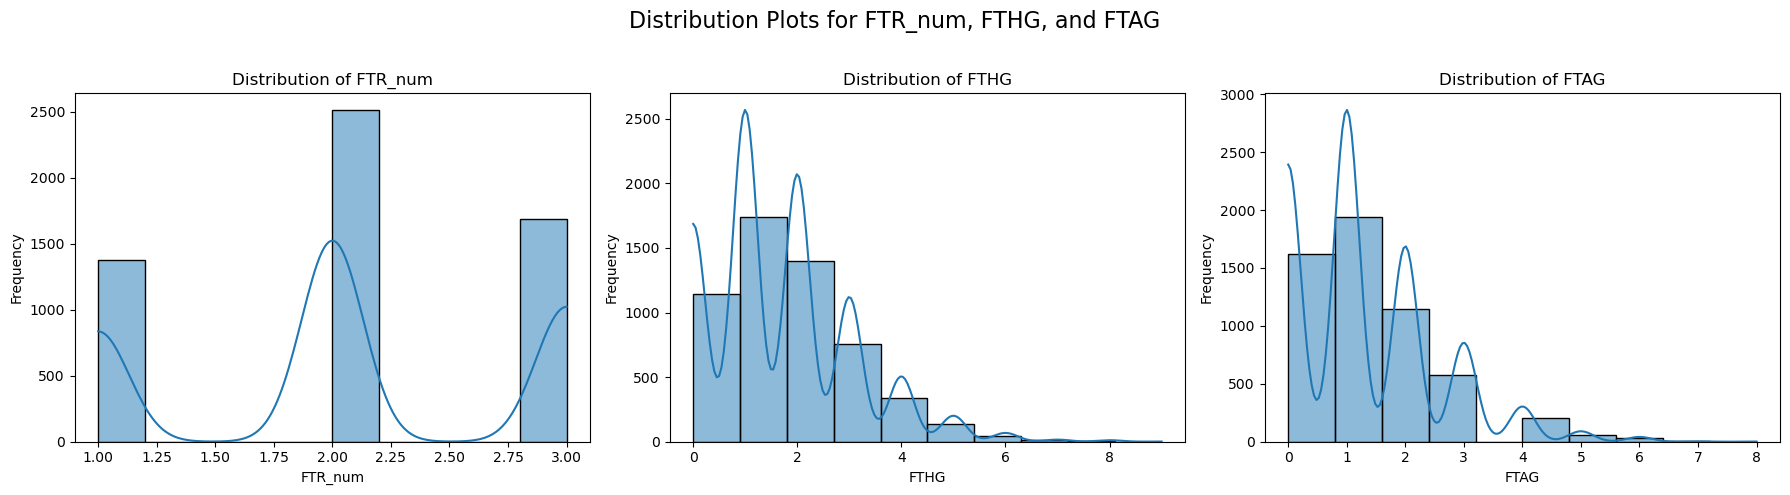

In [1265]:

# Set up a larger figure and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution Plots for FTR_num, FTHG, and FTAG', fontsize=16)

# Plot each distribution
sns.histplot(rolling_stats["FTR_num"], kde=True, bins=10, ax=axes[0])
axes[0].set_title('Distribution of FTR_num')
axes[0].set_xlabel('FTR_num')
axes[0].set_ylabel('Frequency')

sns.histplot(rolling_stats["FTHG"], kde=True, bins=10, ax=axes[1])
axes[1].set_title('Distribution of FTHG')
axes[1].set_xlabel('FTHG')
axes[1].set_ylabel('Frequency')

sns.histplot(rolling_stats["FTAG"], kde=True, bins=10, ax=axes[2])
axes[2].set_title('Distribution of FTAG')
axes[2].set_xlabel('FTAG')
axes[2].set_ylabel('Frequency')

# Show the plots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Correlation Tests

In [630]:
correlation_matrix = rolling_stats.select_dtypes("number").corr()

filtered_correlation = correlation_matrix.applymap(lambda x: x if abs(x) > 0.25 else None)
filtered_correlation

/var/folders/gk/c2gpqh3x7z74jf883m6p8r3c0000gn/T/ipykernel_75926/1913478781.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_correlation = correlation_matrix.applymap(lambda x: x if abs(x) > 0.25 else None)


,FTHG,FTAG,p_home_goals_scored_last_7,p_home_goals_conceded_last_7,p_home_shots_taken_last_7,p_home_shots_conceded_last_7,p_home_shots_on_target_taken_last_7,p_home_shots_on_target_conceded_last_7,p_home_fouls_fouls_last_7,p_home_fouls_fouled_last_7,...,p_away_fouls_fouls_last_7,p_away_fouls_fouled_last_7,p_away_corners_taken_last_7,p_away_corners_conceded_last_7,p_away_yellow_cards_received_last_7,p_away_yellow_cards_provoked_last_7,p_away_red_cards_received_last_7,p_away_red_cards_provoked_last_7,p_home_points_last_7,p_away_points_last_7
FTHG,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FTAG,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_home_goals_scored_last_7,NaN,NaN,1.000000,NaN,0.565705,NaN,0.653538,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778772,NaN
p_home_goals_conceded_last_7,NaN,NaN,NaN,1.000000,NaN,0.501412,NaN,0.564792,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.577746,NaN
p_home_shots_taken_last_7,NaN,NaN,0.565705,NaN,1.000000,NaN,0.775212,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.481141,NaN
p_home_shots_conceded_last_7,NaN,NaN,NaN,0.501412,NaN,1.000000,NaN,0.740387,0.273140,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.298402,NaN
p_home_shots_on_target_taken_last_7,NaN,NaN,0.653538,NaN,0.775212,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.555587,NaN
p_home_shots_on_target_conceded_last_7,NaN,NaN,NaN,0.564792,NaN,0.740387,NaN,1.000000,0.292585,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.368976,NaN
p_home_fouls_fouls_last_7,NaN,NaN,NaN,NaN,NaN,0.273140,NaN,0.292585,1.000000,0.710276,...,0.534836,0.547929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
p_home_fouls_fouled_last_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710276,1.000000,...,0.547990,0.574253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Engineering "FTR" feature

In [1966]:
rolling_stats["FTR_num"] = rolling_stats["FTR"].apply(lambda x: 1 if x == "D" else (2 if x == "H" else 3))

In [1968]:
rolling_stats_bet["FTR_num"] = rolling_stats_bet["FTR"].apply(lambda x: 1 if x == "D" else (2 if x == "H" else 3))

In [2320]:
outcome = pd.get_dummies(rolling_stats_bet["FTR_num"], dtype = int)

In [ ]:
rolling_stats_all = pd.concat([rolling_stats,outcome], axis = 1)

In [2330]:
rolling_stats_all["FTR_num"] = rolling_stats_all["FTR"].apply(lambda x: 1 if x == "D" else (2 if x == "H" else 3))

### Encoding Team Feature (Dummies)

In [634]:
df_cat = rolling_stats.select_dtypes("object").drop(columns="FTR")

In [1528]:
rolling_stats.select_dtypes("number").drop(columns = ["FTHG", "FTAG"])

,p_home_goals_scored_last_7,p_home_goals_conceded_last_7,p_home_shots_taken_last_7,p_home_shots_conceded_last_7,p_home_shots_on_target_taken_last_7,p_home_shots_on_target_conceded_last_7,p_home_fouls_fouls_last_7,p_home_fouls_fouled_last_7,p_home_corners_taken_last_7,p_home_corners_conceded_last_7,...,p_away_yellow_cards_provoked_last_7,p_away_red_cards_received_last_7,p_away_red_cards_provoked_last_7,p_home_points_last_7,p_away_points_last_7,p_home_win_odds_last_7,p_home_draw_odds_last_7,p_away_draw_odds_last_7,p_away_win_odds_last_7,FTR_num
0,20,5,113,65,46,25,72,92,55,25,...,10,0,0,19,10,1.490476,5.019524,3.621429,3.132857,2
1,10,11,105,89,35,37,113,108,44,34,...,7,0,1,9,12,5.010476,4.306190,3.492857,3.935238,3
2,0,0,0,0,0,0,0,0,0,0,...,9,1,0,0,8,NaN,NaN,3.807143,4.187143,1
3,19,10,101,59,44,24,89,122,33,26,...,7,0,2,14,9,1.736190,4.419524,3.560952,3.401905,2
4,15,4,119,83,47,24,105,90,41,40,...,13,1,1,17,11,1.810476,4.260000,3.927619,3.824286,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,12,18,91,114,35,48,112,105,23,33,...,13,1,1,10,17,3.956667,3.857143,4.219524,1.772857,3
5576,10,16,72,118,22,47,111,81,26,46,...,14,0,0,8,1,4.365714,3.769048,3.571429,3.701429,2
5577,7,10,93,102,25,35,92,95,25,40,...,6,1,0,9,19,2.992381,3.435714,5.199048,1.466190,3
5578,7,13,92,106,31,35,112,116,47,42,...,11,0,0,7,4,4.508095,3.902381,3.630952,3.102381,2


In [636]:
df_cat_num = pd.get_dummies(df_cat, dtype = int)
df_cat_num

,HomeTeam_Aachen,HomeTeam_Augsburg,HomeTeam_Bayern Munich,HomeTeam_Bielefeld,HomeTeam_Bochum,HomeTeam_Braunschweig,HomeTeam_Cottbus,HomeTeam_Darmstadt,HomeTeam_Dortmund,HomeTeam_Duisburg,...,AwayTeam_Mainz,AwayTeam_Nurnberg,AwayTeam_Paderborn,AwayTeam_RB Leipzig,AwayTeam_Schalke 04,AwayTeam_St Pauli,AwayTeam_Stuttgart,AwayTeam_Union Berlin,AwayTeam_Werder Bremen,AwayTeam_Wolfsburg
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5577,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1013]:
buli_num = pd.concat([df_cat_num, rolling_stats.select_dtypes("number").drop(columns = ["FTHG", "FTAG"])], axis=1)
buli_num_reg = pd.concat([df_cat_num, rolling_stats.select_dtypes("number")], axis=1)
buli_num_reg

,HomeTeam_Aachen,HomeTeam_Augsburg,HomeTeam_Bayern Munich,HomeTeam_Bielefeld,HomeTeam_Bochum,HomeTeam_Braunschweig,HomeTeam_Cottbus,HomeTeam_Darmstadt,HomeTeam_Dortmund,HomeTeam_Duisburg,...,p_away_fouls_fouled_last_7,p_away_corners_taken_last_7,p_away_corners_conceded_last_7,p_away_yellow_cards_received_last_7,p_away_yellow_cards_provoked_last_7,p_away_red_cards_received_last_7,p_away_red_cards_provoked_last_7,p_home_points_last_7,p_away_points_last_7,FTR_num
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,0,0,0,0,0,0,0,0,0,0,...,82,26,32,23,17,2,1,4,7,1
5576,0,0,0,0,0,0,0,0,0,0,...,77,38,27,9,11,0,0,17,15,2
5577,0,0,0,0,0,0,0,0,0,0,...,92,32,42,18,13,1,1,9,7,1
5578,0,0,0,0,0,0,0,0,0,0,...,62,32,44,9,9,0,0,14,13,1


# Train / Test Split

### Regression

In [1783]:
# Home Goals
features = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target = rolling_stats["FTHG"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)

In [ ]:
# Away Goals
features = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target = rolling_stats["FTAG"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)

#### Scaling

In [1785]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Classification

In [ ]:
# Match Outcome
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl, target_cl, random_state = 3)

In [ ]:
# Home Goals
features_cl_hg = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl_hg = rolling_stats["FTHG"]

X_train_cl_hg, X_test_cl_hg, y_train_cl_hg, y_test_cl_hg = train_test_split(features_cl_hg, target_cl_hg, random_state = 0)

In [ ]:
# Away Goals
features_cl_ag = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl_ag = rolling_stats["FTAG"]

X_train_cl_ag, X_test_cl_ag, y_train_cl_ag, y_test_cl_ag = train_test_split(features_cl_ag, target_cl_ag, random_state = 0)

#### Scaling

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

## Undersampling

In [2188]:
train = pd.DataFrame(X_train_cl_scaled, columns = X_train_cl.columns)

In [2192]:
train["FTR_num"] = y_train_cl.values

In [2210]:
homewins = train[train["FTR_num"] == 2]
awaywins = train[train["FTR_num"] == 3]
draws = train[train["FTR_num"] == 1]

In [2238]:
homewins_undersampled = resample(homewins, 
                                    replace=False, 
                                    n_samples = len(draws),
                                    random_state=0)

away_undersampled = resample(awaywins, 
                                    replace=False, 
                                    n_samples = len(draws),
                                    random_state=0)

In [2244]:
train_under = pd.concat([homewins_undersampled, away_undersampled, draws])

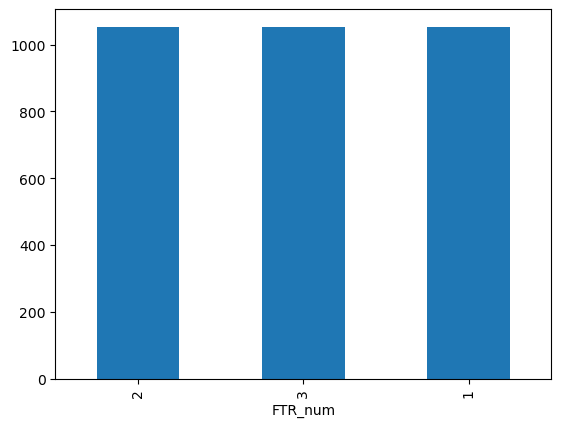

In [2246]:
ftr_plt = train_under["FTR_num"].value_counts()
ftr_plt.plot(kind="bar")
plt.show()

In [2248]:
X_train_under = train_under.drop(columns = ["FTR_num"])
y_train_under = train_under["FTR_num"]

### Train / Test Split & Scaling for Data incl. Betting Odds

In [2009]:
rolling_stats_bet = pd.concat([rolling_stats_bet,buli_df_bet[['B365H', 'B365D', 'B365A']]], axis =1)

features = rolling_stats_bet.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num", 'p_home_win_odds_last_7', 
                                                                   'p_home_draw_odds_last_7', 'p_away_draw_odds_last_7', 
                                                                   'p_away_win_odds_last_7'])
target = rolling_stats_bet["FTHG"]

X_train_bet, X_test_bet, y_train_bet, y_test_bet = train_test_split(features, target, random_state = 0)

In [2011]:
scaler = MinMaxScaler()
scaler.fit(X_train_bet)
X_train_bet_scaled = scaler.transform(X_train_bet)
X_test_bet_scaled = scaler.transform(X_test_bet)

# Linaer Regression - Home Goals

In [1550]:
lin_reg = LinearRegression()

In [1552]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [1556]:
pred = lin_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", lin_reg.score(X_test_scaled, y_test))

MAE 0.9702049616905721
RMSE 1.245853686884869
R2 score -0.14149165277845244


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Descision Tree - Regressor - Home Goals

In [ ]:
features = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target = rolling_stats["FTHG"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1648]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

In [1650]:
pred = tree.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_scaled, y_test))

MAE 1.0395615253310748
RMSE 1.4086121225092239
R2 score -0.459222440356037


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1652]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [1654]:
tree_importance = {feature : importance for feature, importance in zip(X_train_scaled.columns, tree.feature_importances_)}
tree_importance           

{'p_home_goals_scored_last_7': 0.0,
 'p_home_goals_conceded_last_7': 0.05945347585305028,
 'p_home_shots_taken_last_7': 0.0,
 'p_home_shots_conceded_last_7': 0.0,
 'p_home_shots_on_target_taken_last_7': 0.20915427915483295,
 'p_home_shots_on_target_conceded_last_7': 0.0,
 'p_home_fouls_fouls_last_7': 0.10264587738999995,
 'p_home_fouls_fouled_last_7': 0.0,
 'p_home_corners_taken_last_7': 0.3567647561060922,
 'p_home_corners_conceded_last_7': 0.0,
 'p_home_yellow_cards_received_last_7': 0.0,
 'p_home_yellow_cards_provoked_last_7': 0.10213519604073844,
 'p_home_red_cards_received_last_7': 0.0,
 'p_home_red_cards_provoked_last_7': 0.0,
 'p_away_goals_scored_last_7': 0.0,
 'p_away_goals_conceded_last_7': 0.1270388430529505,
 'p_away_shots_taken_last_7': 0.0,
 'p_away_shots_conceded_last_7': 0.024594429327244684,
 'p_away_shots_on_target_taken_last_7': 0.004065194930123075,
 'p_away_shots_on_target_conceded_last_7': 0.0,
 'p_away_fouls_fouls_last_7': 0.0,
 'p_away_fouls_fouled_last_7': 0.0,

### Testing Correlations for fewer Features

In [1053]:
df_corr = rolling_stats[[
    "p_home_goals_scored_last_7", "p_home_shots_taken_last_7", 
    "p_home_fouls_fouls_last_7", "p_away_goals_scored_last_7", 
    "p_away_shots_conceded_last_7", "p_away_points_last_7",
    "FTHG", "FTR_num", "FTAG"
]].corr()

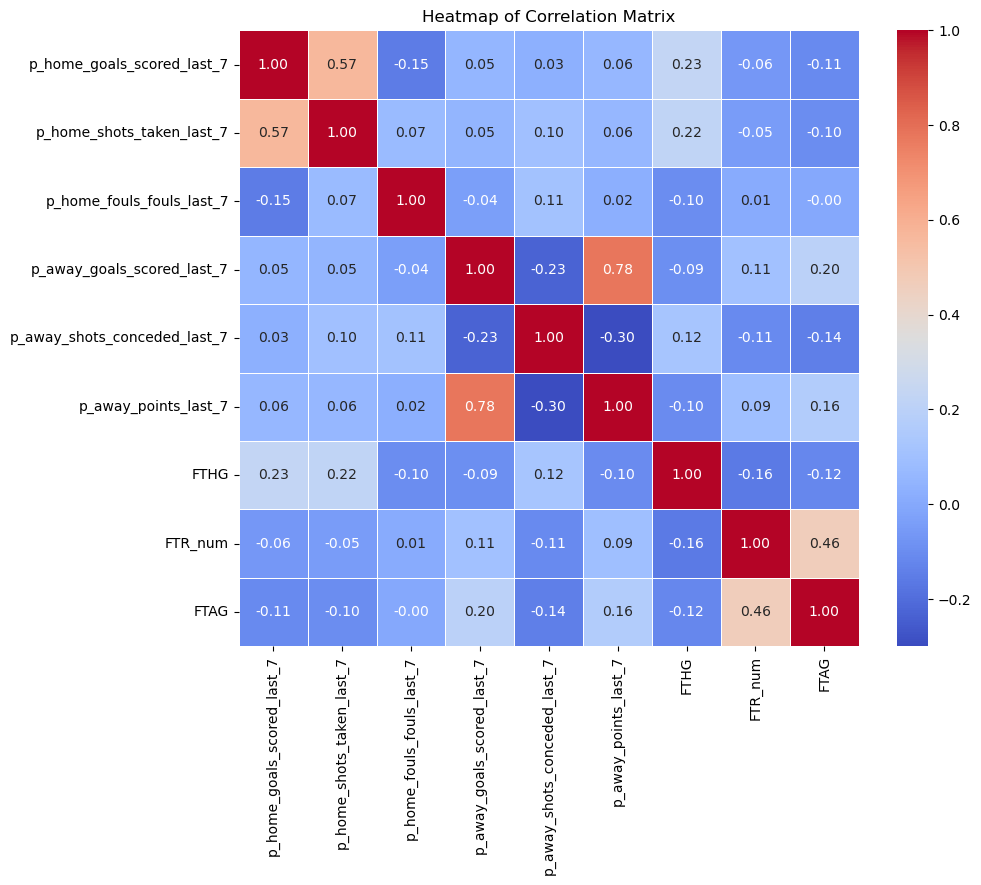

In [1055]:
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

### Testing with Team features

In [1015]:
features = buli_num_reg.select_dtypes("number").drop(columns=["FTR_num", "FTHG", "FTAG"])
target = buli_num_reg["FTHG"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)

In [1017]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [1031]:
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

In [1033]:
pred = tree.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_scaled, y_test))

MAE 1.0190694237808222
RMSE 1.2866301322408624
R2 score 0.06696429260679648


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Updating Features

In [958]:
# Assuming X_train and X_test are the original DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now you can select the specific columns for each
X_train_scaled_new = X_train_scaled[[
    "p_home_goals_scored_last_7", "p_home_shots_taken_last_7", 
    "p_home_fouls_fouls_last_7", "p_away_goals_scored_last_7", 
    "p_away_shots_conceded_last_7", "p_away_points_last_7"
]]

X_test_scaled_new = X_test_scaled[[
    "p_home_goals_scored_last_7", "p_home_shots_taken_last_7", 
    "p_home_fouls_fouls_last_7", "p_away_goals_scored_last_7", 
    "p_away_shots_conceded_last_7", "p_away_points_last_7"
]]

In [984]:
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train_scaled_new, y_train)

DecisionTreeRegressor(max_depth=2)

In [986]:
pred = tree.predict(X_test_scaled_new)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_scaled_new, y_test))

MAE 0.5649873687496334
RMSE 0.7339457906570434
R2 score 0.01187342956720272


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Descision Tree - Regressor - Away Goals

In [1431]:
features = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target = rolling_stats["FTAG"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)

In [1433]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1443]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3)

In [1445]:
pred = tree.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", tree.score(X_test_scaled, y_test))

MAE 0.898219109047853
RMSE 1.1209847346445483
R2 score 0.05203034885363522


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# KNN - Regressor

In [2361]:
knn = KNeighborsRegressor(n_neighbors = 55)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=55)

In [2363]:
knn.score(X_test_scaled, y_test)

0.0546338884740469

In [659]:
# Test with updated features

In [2365]:
knn = KNeighborsRegressor(n_neighbors = 200)
knn.fit(X_train_scaled_new, y_train)

KNeighborsRegressor(n_neighbors=200)

In [2367]:
knn.score(X_test_scaled_new, y_test)

0.043413834824217866

### Testing with fewer variables

In [1116]:
features = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num" ])
target = rolling_stats["FTHG"]

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0)

In [1118]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [1120]:
# Assuming X_train and X_test are the original DataFrames with column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now you can select the specific columns for each
X_train_scaled_new = X_train_scaled[[
    "p_home_goals_scored_last_7", "p_home_shots_taken_last_7", 
    "p_away_shots_conceded_last_7"
]]

X_test_scaled_new = X_test_scaled[[
    "p_home_goals_scored_last_7", "p_home_shots_taken_last_7", 
    "p_away_shots_conceded_last_7"
]]

In [1142]:
knn = KNeighborsRegressor(n_neighbors = 400)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=400)

In [1144]:
knn.score(X_test_scaled, y_test)

0.06654031597464605

# KNN - Classifier

In [1936]:
knn = KNeighborsClassifier(n_neighbors = 250)
knn.fit(X_train_cl_scaled, y_train_cl)

KNeighborsClassifier(n_neighbors=250)

In [1938]:
knn.score(X_test_cl_scaled, y_test_cl)

0.33691756272401435

# Decision Tree - Classifier

In [669]:
# Train / Test Split

In [1313]:
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl, target_cl, random_state = 0)

In [1315]:
# Scaling

scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)


In [1317]:
tree = DecisionTreeClassifier(max_depth=7)

In [1319]:
tree.fit(X_train_cl_scaled, y_train_cl)

DecisionTreeClassifier(max_depth=7)

In [1321]:
pred = tree.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.4845878136200717
              precision    recall  f1-score   support

           1       0.33      0.05      0.09       352
           2       0.51      0.79      0.62       631
           3       0.44      0.39      0.41       412

    accuracy                           0.48      1395
   macro avg       0.43      0.41      0.38      1395
weighted avg       0.44      0.48      0.43      1395



In [1327]:
X_train_cl_scaled = pd.DataFrame(X_train_cl_scaled, columns = X_train_cl.columns)

In [1329]:
tree_importance = {feature : importance for feature, importance in zip(X_train_cl_scaled.columns, tree.feature_importances_)}
tree_importance           

{'p_home_goals_scored_last_7': 0.0370038823719352,
 'p_home_goals_conceded_last_7': 0.0,
 'p_home_shots_taken_last_7': 0.006129651841414653,
 'p_home_shots_conceded_last_7': 0.06028714198405469,
 'p_home_shots_on_target_taken_last_7': 0.008596762026781911,
 'p_home_shots_on_target_conceded_last_7': 0.03332318609352399,
 'p_home_fouls_fouls_last_7': 0.029005365877796178,
 'p_home_fouls_fouled_last_7': 0.02265764517716137,
 'p_home_corners_taken_last_7': 0.02110843861797485,
 'p_home_corners_conceded_last_7': 0.023838371730202736,
 'p_home_yellow_cards_received_last_7': 0.010220590766762305,
 'p_home_yellow_cards_provoked_last_7': 0.013066350685355967,
 'p_home_red_cards_received_last_7': 0.0,
 'p_home_red_cards_provoked_last_7': 0.0,
 'p_away_goals_scored_last_7': 0.0041476937728713815,
 'p_away_goals_conceded_last_7': 0.010680147653788451,
 'p_away_shots_taken_last_7': 0.020086578644709516,
 'p_away_shots_conceded_last_7': 0.0029683418040133552,
 'p_away_shots_on_target_taken_last_7': 

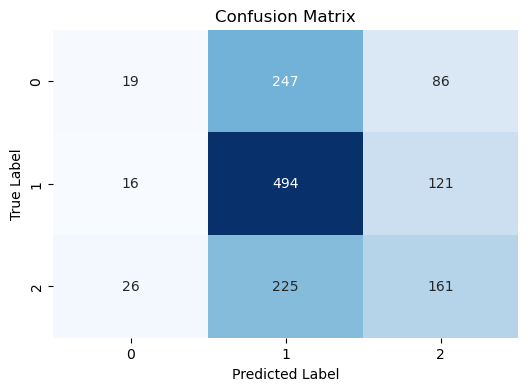

In [1260]:
cm = confusion_matrix(y_test_cl, pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Testing with team features

In [676]:
# Test / Train Split

In [729]:
features_cl = spaceship_num.select_dtypes("number").drop(columns=["FTR_num"])
target_cl = spaceship_num["FTR_num"]

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl, target_cl, random_state = 0)

In [731]:
# Scaling

scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

In [759]:
tree = DecisionTreeClassifier(max_depth=7)

In [761]:
tree.fit(X_train_cl_scaled, y_train_cl)

DecisionTreeClassifier(max_depth=7)

In [763]:
pred = tree.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.45663082437275987
              precision    recall  f1-score   support

           1       0.28      0.10      0.15       358
           2       0.53      0.64      0.58       633
           3       0.39      0.49      0.44       404

    accuracy                           0.46      1395
   macro avg       0.40      0.41      0.39      1395
weighted avg       0.43      0.46      0.43      1395



In [771]:
X_train_cl_scaled = pd.DataFrame(X_train_cl_scaled, columns = X_train_cl.columns)

In [773]:
tree_importance = {feature : importance for feature, importance in zip(X_train_cl_scaled.columns, tree.feature_importances_)}
tree_importance       

{'HomeTeam_Aachen': 0.0,
 'HomeTeam_Augsburg': 0.0,
 'HomeTeam_Bayern Munich': 0.00729173429285812,
 'HomeTeam_Bielefeld': 0.0,
 'HomeTeam_Bochum': 0.0,
 'HomeTeam_Braunschweig': 0.0,
 'HomeTeam_Cottbus': 0.0,
 'HomeTeam_Darmstadt': 0.0,
 'HomeTeam_Dortmund': 0.0,
 'HomeTeam_Duisburg': 0.0,
 'HomeTeam_Ein Frankfurt': 0.0,
 'HomeTeam_FC Koln': 0.0,
 'HomeTeam_Fortuna Dusseldorf': 0.0,
 'HomeTeam_Freiburg': 0.0,
 'HomeTeam_Greuther Furth': 0.0,
 'HomeTeam_Hamburg': 0.0,
 'HomeTeam_Hannover': 0.0,
 'HomeTeam_Hansa Rostock': 0.0,
 'HomeTeam_Heidenheim': 0.0,
 'HomeTeam_Hertha': 0.0,
 'HomeTeam_Hoffenheim': 0.0,
 'HomeTeam_Holstein Kiel': 0.0,
 'HomeTeam_Ingolstadt': 0.0,
 'HomeTeam_Kaiserslautern': 0.0,
 'HomeTeam_Karlsruhe': 0.0,
 'HomeTeam_Leverkusen': 0.0,
 "HomeTeam_M'gladbach": 0.0,
 'HomeTeam_Mainz': 0.0,
 'HomeTeam_Nurnberg': 0.0,
 'HomeTeam_Paderborn': 0.0,
 'HomeTeam_RB Leipzig': 0.0,
 'HomeTeam_Schalke 04': 0.0,
 'HomeTeam_St Pauli': 0.0,
 'HomeTeam_Stuttgart': 0.0,
 'HomeTeam_Un

### Testing with fewer features

In [1102]:
# Assuming X_train and X_test are the original DataFrames with column names
X_train_cl_scaled = pd.DataFrame(X_train_cl_scaled, columns=X_train_cl.columns)
X_test_cl_scaled = pd.DataFrame(X_test_cl_scaled, columns=X_test_cl.columns)

# Now you can select the specific columns for each
X_train_cl_scaled_new = X_train_cl_scaled[[
    "p_home_goals_scored_last_7", "p_home_shots_taken_last_7", 
    "p_away_shots_conceded_last_7"
]]

X_test_cl_scaled_new = X_test_cl_scaled[[
    "p_home_goals_scored_last_7", "p_home_shots_taken_last_7", 
    "p_away_shots_conceded_last_7"
]]

In [1110]:
tree = DecisionTreeClassifier(max_depth=4)

In [1112]:
tree.fit(X_train_cl_scaled_new, y_train_cl)

DecisionTreeClassifier(max_depth=4)

In [1114]:
pred = tree.predict(X_test_cl_scaled_new)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.46953405017921146
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       358
           2       0.48      0.84      0.61       633
           3       0.43      0.30      0.36       404

    accuracy                           0.47      1395
   macro avg       0.30      0.38      0.32      1395
weighted avg       0.34      0.47      0.38      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Logistic Regression

### Game Outcome

In [2175]:
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTR_num"]

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl, target_cl, random_state = 3)

In [2177]:
# Scaling

scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

In [2179]:
log_reg = LogisticRegression()

In [2181]:
log_reg.fit(X_train_cl_scaled, y_train_cl)

LogisticRegression()

In [2183]:
pred = log_reg.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.5111111111111111
              precision    recall  f1-score   support

           1       0.33      0.04      0.07       326
           2       0.53      0.82      0.64       648
           3       0.48      0.40      0.43       421

    accuracy                           0.51      1395
   macro avg       0.45      0.42      0.38      1395
weighted avg       0.47      0.51      0.45      1395



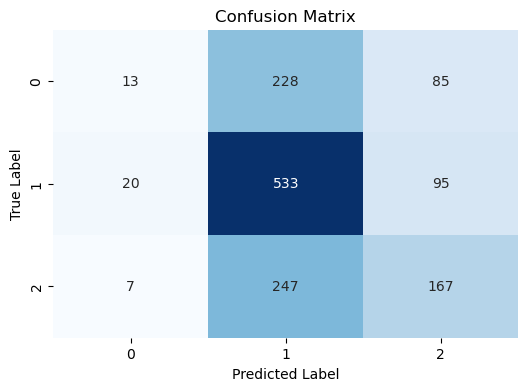

In [1841]:
cm = confusion_matrix(y_test_cl, pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### Testing coefficients

In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_cl_scaled, y_train_cl)

# Extract coefficients and create a DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train_cl.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort features by the absolute value of their coefficients
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)

print(feature_importance)


### Game Outcome - Undersampling

In [ ]:
X_train_under = train_under.drop(columns = ["FTR_num"])
y_train_under = train_under["FTR_num"]

In [2253]:
log_reg = LogisticRegression()

In [2255]:
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [2257]:
pred = log_reg.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.4666666666666667
              precision    recall  f1-score   support

           1       0.25      0.29      0.27       326
           2       0.60      0.53      0.56       648
           3       0.47      0.51      0.49       421

    accuracy                           0.47      1395
   macro avg       0.44      0.44      0.44      1395
weighted avg       0.48      0.47      0.47      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [2259]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_under, y_train_under)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [2263]:
pred = grid_search.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.4659498207885305
              precision    recall  f1-score   support

           1       0.25      0.25      0.25       326
           2       0.60      0.56      0.58       648
           3       0.45      0.49      0.47       421

    accuracy                           0.47      1395
   macro avg       0.43      0.43      0.43      1395
weighted avg       0.47      0.47      0.47      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Home Team's Goals

In [2279]:
features_cl_hg = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl_hg = rolling_stats["FTHG"]

X_train_cl_hg, X_test_cl_hg, y_train_cl_hg, y_test_cl_hg = train_test_split(features_cl_hg, target_cl_hg, random_state = 0)

In [2281]:
# Scaling

scaler = MinMaxScaler()
scaler.fit(X_train_cl_hg)
X_train_cl_hg_scaled = scaler.transform(X_train_cl_hg)
X_test_cl_hg_scaled = scaler.transform(X_test_cl_hg)

In [2283]:
log_reg_hg = LogisticRegression()

In [2285]:
log_reg_hg.fit(X_train_cl_hg_scaled, y_train_cl_hg)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2287]:
pred_hg = log_reg.predict(X_test_cl_hg_scaled)

print("Accuracy:", accuracy_score(y_test_cl_hg, pred_hg))
print(classification_report(y_test_cl_hg, pred_hg))

Accuracy: 0.221505376344086
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.32      0.29      0.31       439
           2       0.25      0.41      0.31       338
           3       0.10      0.24      0.14       176
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.22      1395
   macro avg       0.07      0.09      0.08      1395
weighted avg       0.17      0.22      0.19      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no 

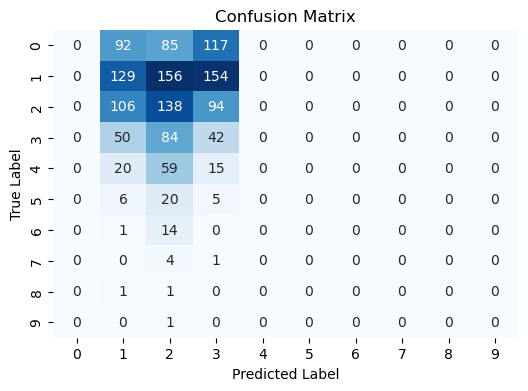

In [2289]:
cm = confusion_matrix(y_test_cl_hg, pred_hg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [2300]:
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_cl_hg_scaled, y_train_cl_hg)

# Extract coefficients and create a DataFrame
feature_importance = pd.DataFrame({
    'Feature': X_train_cl.columns,
    'Coefficient': log_reg.coef_[0]
})

# Sort features by the absolute value of their coefficients
feature_importance['Absolute_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance.sort_values(by='Absolute_Coefficient', ascending=False, inplace=True)

print(feature_importance)


                                   Feature  Coefficient  Absolute_Coefficient
17            p_away_shots_conceded_last_7    -1.426016              1.426016
0               p_home_goals_scored_last_7    -1.424376              1.424376
3             p_home_shots_conceded_last_7     1.253256              1.253256
6                p_home_fouls_fouls_last_7     1.076367              1.076367
24     p_away_yellow_cards_received_last_7    -0.891948              0.891948
12        p_home_red_cards_received_last_7    -0.824021              0.824021
14              p_away_goals_scored_last_7     0.769827              0.769827
28                    p_home_points_last_7    -0.718779              0.718779
8              p_home_corners_taken_last_7    -0.708500              0.708500
2                p_home_shots_taken_last_7    -0.690401              0.690401
11     p_home_yellow_cards_provoked_last_7     0.632529              0.632529
23          p_away_corners_conceded_last_7     0.618091         

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2291]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_cla = HistGradientBoostingClassifier()
hist_cla.fit(X_train_cl_hg_scaled, y_train_cl_hg)

HistGradientBoostingClassifier()

In [2293]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = hist_cla.predict(X_test_cl_hg_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_cl_hg, y_pred)
print(f"Accuracy of the HistGradientBoostingClassifier model: {accuracy:.2f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test_cl_hg, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_cl_hg, y_pred))


Accuracy of the HistGradientBoostingClassifier model: 0.27

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.22      0.24       294
           1       0.33      0.41      0.36       439
           2       0.24      0.28      0.26       338
           3       0.15      0.11      0.12       176
           4       0.17      0.10      0.12        94
           5       0.04      0.03      0.04        31
           6       0.33      0.13      0.19        15
           7       0.00      0.00      0.00         5
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         1

    accuracy                           0.27      1395
   macro avg       0.20      0.18      0.18      1395
weighted avg       0.25      0.27      0.26      1395

Confusion Matrix:
[[ 64 111  86  25   7   1   0   0   0   0]
 [ 85 182 120  31   9  10   2   0   0   0]
 [ 50 143  94  36  11   2   1   1   0   0]
 [ 23  76  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2308]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_cl_hg_scaled, y_train_cl_hg)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [2310]:
print("Best parameters for precision:", grid_search.best_params_)
print("Best precision score from grid search:", grid_search.best_score_)

Best parameters for precision: {'C': 0.1}
Best precision score from grid search: 0.31589008363201915


In [2316]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Retrieve the best model from GridSearchCV
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = grid_search.predict(X_test_cl_hg_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_cl_hg, y_pred)
print(f"Accuracy of the best logistic regression model: {accuracy:.2f}")

# Additional evaluation metrics (optional)
print("\nClassification Report:")
print(classification_report(y_test_cl_hg, pred_hg))

print("Confusion Matrix:")
print(confusion_matrix(y_test_cl_hg, pred_hg))

Accuracy of the best logistic regression model: 0.30

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.32      0.29      0.31       439
           2       0.25      0.41      0.31       338
           3       0.10      0.24      0.14       176
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.22      1395
   macro avg       0.07      0.09      0.08      1395
weighted avg       0.17      0.22      0.19      1395

Confusion Matrix:
[[  0  92  85 117   0   0   0   0   0   0]
 [  0 129 156 154   0   0   0   0   0   0]
 [  0 106 138  94   0   0   0   0   0   0]
 [  0  50  84  42

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


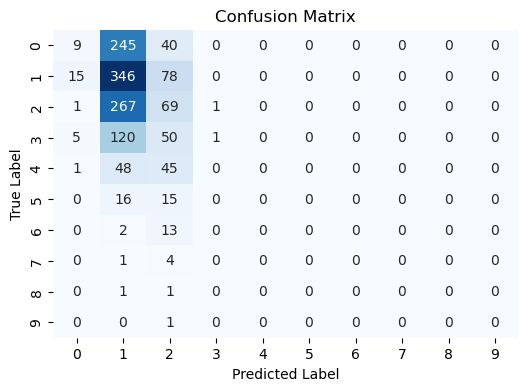

In [2112]:
cm = confusion_matrix(y_test_cl_hg, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Away Team's Goals

In [2119]:
features_cl_ag = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl_ag = rolling_stats["FTAG"]

X_train_cl_ag, X_test_cl_ag, y_train_cl_ag, y_test_cl_ag = train_test_split(features_cl_ag, target_cl_ag, random_state = 0)

In [2121]:
# Scaling

scaler = MinMaxScaler()
scaler.fit(X_train_cl_ag)
X_train_cl_ag_scaled = scaler.transform(X_train_cl_ag)
X_test_cl_ag_scaled = scaler.transform(X_test_cl_ag)

In [2123]:
log_reg_ag = LogisticRegression()

In [2125]:
log_reg_ag.fit(X_train_cl_ag_scaled, y_train_cl_ag)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2127]:
pred_ag = log_reg.predict(X_test_cl_ag_scaled)

print("Accuracy:", accuracy_score(y_test_cl_ag, pred_ag))
print(classification_report(y_test_cl_ag, pred_ag))

Accuracy: 0.34408602150537637
              precision    recall  f1-score   support

           0       0.34      0.26      0.29       416
           1       0.35      0.76      0.48       485
           2       0.25      0.01      0.01       301
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         4

    accuracy                           0.34      1395
   macro avg       0.13      0.15      0.11      1395
weighted avg       0.28      0.34      0.26      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


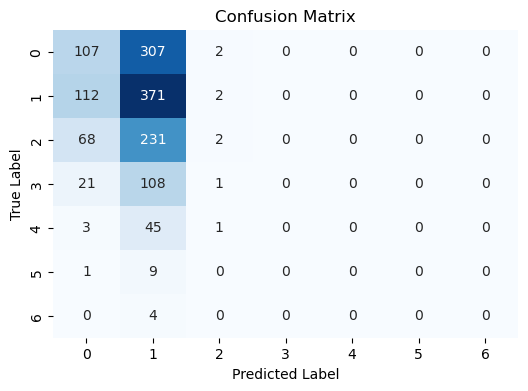

In [2141]:
cm = confusion_matrix(y_test_cl_ag, pred_ag)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [2129]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_cla = HistGradientBoostingClassifier()
hist_cla.fit(X_train_cl_ag_scaled, y_train_cl_ag)

HistGradientBoostingClassifier()

In [2131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = hist_cla.predict(X_test_cl_ag_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_cl_ag, y_pred)
print(f"Accuracy of the HistGradientBoostingClassifier model: {accuracy:.2f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test_cl_ag, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_cl_ag, y_pred))


Accuracy of the HistGradientBoostingClassifier model: 0.24

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.21      0.24       416
           1       0.34      0.34      0.34       485
           2       0.21      0.24      0.23       301
           3       0.07      0.05      0.06       130
           4       0.03      0.04      0.03        49
           5       0.04      0.20      0.07        10
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.24      1395
   macro avg       0.11      0.12      0.11      1395
weighted avg       0.25      0.24      0.24      1395

Confusion Matrix:
[[ 88 150 106  34  22   9   5   0   2]
 [122 163 121  31  27  11   8   1   1]
 [ 75  99  73  18  16  15   4   0   1]
 [ 25  46  34   7  10   7   1   0   0]
 [  9  18   8   7   2   4   1   0   0]

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2133]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_cl_ag_scaled, y_train_cl_ag)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [2135]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Retrieve the best model from GridSearchCV
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_cl_ag_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test_cl_ag, pred_ag)
print(f"Accuracy of the best logistic regression model: {accuracy:.2f}")

# Additional evaluation metrics (optional)
print("\nClassification Report:")
print(classification_report(y_test_cl_ag, pred_ag))

print("Confusion Matrix:")
print(confusion_matrix(y_test_cl_ag, pred_ag))

Accuracy of the best logistic regression model: 0.34

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.26      0.29       416
           1       0.35      0.76      0.48       485
           2       0.25      0.01      0.01       301
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         4

    accuracy                           0.34      1395
   macro avg       0.13      0.15      0.11      1395
weighted avg       0.28      0.34      0.26      1395

Confusion Matrix:
[[107 307   2   0   0   0   0]
 [112 371   2   0   0   0   0]
 [ 68 231   2   0   0   0   0]
 [ 21 108   1   0   0   0   0]
 [  3  45   1   0   0   0   0]
 [  1   9   0   0   0   0   0]
 [  0   4   0   0   0   0   0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Class-imbalance Handeling

In [2163]:
features_cl_hg = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl_hg = rolling_stats["FTHG"]

X_train_cl_hg, X_test_cl_hg, y_train_cl_hg, y_test_cl_hg = train_test_split(features_cl_hg, target_cl_hg, random_state = 0)

In [2165]:
# Scaling

scaler = MinMaxScaler()
scaler.fit(X_train_cl_hg)
X_train_cl_hg_scaled = scaler.transform(X_train_cl_hg)
X_test_cl_hg_scaled = scaler.transform(X_test_cl_hg)

In [2167]:
model = LogisticRegression(class_weight='balanced')


In [2169]:
model.fit(X_train_cl_hg_scaled, y_train_cl_hg)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [2171]:
pred = model.predict(X_test_cl_hg_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.07526881720430108
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.21      0.13      0.17       326
           2       0.47      0.05      0.09       648
           3       0.34      0.07      0.12       421
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.08      1395
   macro avg       0.11      0.03      0.04      1395
weighted avg       0.37      0.08      0.11      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Test: Logistic Regression incl. Betting odds

In [2013]:
log_reg.fit(X_train_bet_scaled, y_train_bet)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [2025]:
X_train_bet.columns

Index(['p_home_goals_scored_last_7', 'p_home_goals_conceded_last_7',
       'p_home_shots_taken_last_7', 'p_home_shots_conceded_last_7',
       'p_home_shots_on_target_taken_last_7',
       'p_home_shots_on_target_conceded_last_7', 'p_home_fouls_fouls_last_7',
       'p_home_fouls_fouled_last_7', 'p_home_corners_taken_last_7',
       'p_home_corners_conceded_last_7', 'p_home_yellow_cards_received_last_7',
       'p_home_yellow_cards_provoked_last_7',
       'p_home_red_cards_received_last_7', 'p_home_red_cards_provoked_last_7',
       'p_away_goals_scored_last_7', 'p_away_goals_conceded_last_7',
       'p_away_shots_taken_last_7', 'p_away_shots_conceded_last_7',
       'p_away_shots_on_target_taken_last_7',
       'p_away_shots_on_target_conceded_last_7', 'p_away_fouls_fouls_last_7',
       'p_away_fouls_fouled_last_7', 'p_away_corners_taken_last_7',
       'p_away_corners_conceded_last_7', 'p_away_yellow_cards_received_last_7',
       'p_away_yellow_cards_provoked_last_7',
       'p_a

In [2015]:
pred = log_reg.predict(X_test_bet_scaled)

print("Accuracy:", accuracy_score(y_test_bet, pred))
print(classification_report(y_test_bet, pred))

Accuracy: 0.30752688172043013
              precision    recall  f1-score   support

           0       0.30      0.06      0.11       294
           1       0.33      0.74      0.46       439
           2       0.24      0.22      0.23       338
           3       0.24      0.07      0.11       176
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.31      1395
   macro avg       0.11      0.11      0.09      1395
weighted avg       0.26      0.31      0.24      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2039]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression())
])
pipeline.fit(X_train_bet_scaled, y_train_bet)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer', SimpleImputer()),
                ('classifier', LogisticRegression())])

In [2040]:
pred = log_reg.predict(X_test_bet_scaled)

print("Accuracy:", accuracy_score(y_test_bet, pred))
print(classification_report(y_test_bet, pred))

Accuracy: 0.30752688172043013
              precision    recall  f1-score   support

           0       0.30      0.06      0.11       294
           1       0.33      0.74      0.46       439
           2       0.24      0.22      0.23       338
           3       0.24      0.07      0.11       176
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.31      1395
   macro avg       0.11      0.11      0.09      1395
weighted avg       0.26      0.31      0.24      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Classifier - Home Goals

In [1843]:
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTHG"]

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl, target_cl, random_state = 0)

In [1845]:
# Scaling

scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

In [1847]:
log_reg = LogisticRegression()

In [1472]:
'''
imputer = SimpleImputer(strategy='mean', add_indicator=True)
X_train_cl_scaled = imputer.fit_transform(X_train_cl_scaled)
X_test_cl_scaled = imputer.transform(X_test_cl_scaled)
'''

In [1849]:
log_reg.fit(X_train_cl_scaled, y_train_cl)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1851]:
pred = log_reg.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.3017921146953405
              precision    recall  f1-score   support

           0       0.27      0.06      0.10       294
           1       0.33      0.73      0.45       439
           2       0.24      0.23      0.23       338
           3       0.19      0.03      0.05       176
           4       0.00      0.00      0.00        94
           5       0.00      0.00      0.00        31
           6       0.00      0.00      0.00        15
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1

    accuracy                           0.30      1395
   macro avg       0.10      0.10      0.08      1395
weighted avg       0.24      0.30      0.23      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


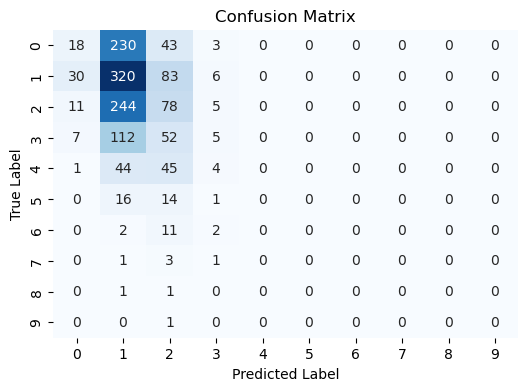

In [1853]:
cm = confusion_matrix(y_test_cl, pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Classifier - Away Goals

In [1906]:
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTAG"]

X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_cl, target_cl, random_state = 0)

In [1908]:
# Scaling

scaler = MinMaxScaler()
scaler.fit(X_train_cl)
X_train_cl_scaled = scaler.transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

In [1910]:
log_reg = LogisticRegression()

In [1912]:
log_reg.fit(X_train_cl_scaled, y_train_cl)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1914]:
pred = log_reg.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.34408602150537637
              precision    recall  f1-score   support

           0       0.34      0.26      0.29       416
           1       0.35      0.76      0.48       485
           2       0.25      0.01      0.01       301
           3       0.00      0.00      0.00       130
           4       0.00      0.00      0.00        49
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         4

    accuracy                           0.34      1395
   macro avg       0.13      0.15      0.11      1395
weighted avg       0.28      0.34      0.26      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Random Forrest

### Regression

In [1598]:
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=5),
                               n_estimators=50,
                               max_samples = 200)

In [1600]:
bagging_reg.fit(X_train_scaled, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5), max_samples=200,
                 n_estimators=50)

In [1604]:
pred = bagging_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_scaled, y_test))

MAE 0.9495440634890814
RMSE 1.2122597746073458
R2 score -0.08076194861647412


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1606]:
forest = RandomForestRegressor(n_estimators=100,
                             max_depth=20)

In [1608]:
forest.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=20)

In [1610]:
pred = forest.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", forest.score(X_test_scaled, y_test))

MAE 0.9644037311894454
RMSE 1.2331288683365154
R2 score -0.11829294868875029


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Classification

In [1916]:
bagging_cla = BaggingClassifier(DecisionTreeClassifier(max_depth=8),
                               n_estimators=100,
                               max_samples = 1000)

In [1918]:
bagging_cla.fit(X_train_cl_scaled, y_train_cl)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=8),
                  max_samples=1000, n_estimators=100)

In [1920]:
pred = tree.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [1924]:
forest = RandomForestClassifier(n_estimators=100,
                             max_depth=4)


In [1307]:
forest.fit(X_train_cl_scaled, y_train_cl)

RandomForestClassifier(max_depth=4)

In [1309]:
pred = forest.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.4946236559139785
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       352
           2       0.49      0.94      0.64       631
           3       0.55      0.24      0.34       412

    accuracy                           0.49      1395
   macro avg       0.34      0.39      0.33      1395
weighted avg       0.38      0.49      0.39      1395



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### HalvingGridSearchCV

In [1894]:
# HalvingGridSearchCV
# also takes very long time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Step 1: Define features and target
features_cl = rolling_stats.select_dtypes("number").drop(columns=["FTHG", "FTAG", "FTR_num"])
target_cl = rolling_stats["FTAG"]

# Step 2: Train a preliminary model to get feature importances
preliminary_rf = RandomForestClassifier(random_state=42)
preliminary_rf.fit(features_cl, target_cl)

# Step 3: Filter features based on importance threshold
importance_threshold = 0.0  # Using 0 threshold as requested
feature_importances = pd.DataFrame({
    'Feature': features_cl.columns,
    'Importance': preliminary_rf.feature_importances_
})
important_features = feature_importances[feature_importances['Importance'] >= importance_threshold]['Feature']
features_important = features_cl[important_features]

# Step 4: Remove zero-variance columns
features_important = features_important.loc[:, features_important.var() > 0]

# Step 5: Split and scale the filtered dataset
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(features_important, target_cl, random_state=42)

# Scaling based on filtered features only
scaler = MinMaxScaler()
X_train_cl_scaled = scaler.fit_transform(X_train_cl)
X_test_cl_scaled = scaler.transform(X_test_cl)

# Define parameter grid for HalvingGridSearchCV
param_grid = {
    'n_estimators': [500, 750, 1000, 1250],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForest model and HalvingGridSearchCV
rf_model = RandomForestClassifier(random_state=42)
halving_search = HalvingGridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    factor=2,                     # Each iteration reduces the number of candidates by half
    scoring='accuracy',
    cv=5,                         # 5-fold cross-validation
    n_jobs=-1                     # Use all processors
)

# Fit HalvingGridSearchCV on the scaled training data
halving_search.fit(X_train_cl_scaled, y_train_cl)

# Output the best parameters and the best cross-validation score
print("Best Parameters from HalvingGridSearchCV:", halving_search.best_params_)
print("Best Cross-Validation Score from HalvingGridSearchCV:", halving_search.best_score_)

# Evaluation using the best model from HalvingGridSearchCV
best_rf_model_halving = halving_search.best_estimator_
y_pred_halving = best_rf_model_halving.predict(X_test_cl_scaled)
print("\nHalvingGridSearchCV Model Evaluation")
print("Accuracy:", accuracy_score(y_test_cl, y_pred_halving))
print("Classification Report:\n", classification_report(y_test_cl, y_pred_halving))
print("Confusion Matrix:\n", confusion_matrix(y_test_cl, y_pred_halving))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/anaconda3/lib/python

Best Parameters from HalvingGridSearchCV: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best Cross-Validation Score from HalvingGridSearchCV: 0.35

HalvingGridSearchCV Model Evaluation
Accuracy: 0.3419354838709677
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.29      0.33       409
           1       0.34      0.74      0.46       463
           2       0.23      0.05      0.08       291
           3       0.16      0.02      0.04       145
           4       0.00      0.00      0.00        54
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00        13

    accuracy                           0.34      1395
   macro avg       0.16      0.16      0.13      1395
weighted avg       0.29      0.34      0.27      1395

Confusion Matrix:
 [[117 281   9   2   0   0   0]
 [ 97 343  21   2   0   0   0]
 [ 55 213  14   9   0   0   0]
 [ 17 119   6

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Ada Boost

### Regressor

In [1612]:
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),
                            n_estimators=100)

In [1614]:
imputer = SimpleImputer(strategy='mean', add_indicator=True)
X_train_cl_scaled = imputer.fit_transform(X_train_cl_scaled)
X_test_cl_scaled = imputer.transform(X_test_cl_scaled)


In [1616]:
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [1618]:
pred = ada_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_scaled, y_test))

MAE 0.8720364726278388
RMSE 1.1903194076107182
R2 score -0.04199512181429221


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Classifier

In [2053]:
imputer = SimpleImputer(strategy='mean', add_indicator=True)
X_train_cl_scaled = imputer.fit_transform(X_train_cl_scaled)
X_test_cl_scaled = imputer.transform(X_test_cl_scaled)


In [2055]:
ada_cla = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                            n_estimators=100)


In [2057]:
ada_cla.fit(X_train_cl_scaled, y_train_cl)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [2059]:
pred = ada_cla.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.3118279569892473
              precision    recall  f1-score   support

           0       0.31      0.87      0.46       416
           1       0.34      0.08      0.14       485
           2       0.31      0.08      0.13       301
           3       0.21      0.05      0.08       130
           4       0.14      0.02      0.04        49
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         4

    accuracy                           0.31      1395
   macro avg       0.19      0.16      0.12      1395
weighted avg       0.30      0.31      0.22      1395



# Gradient Boosting

### Regressor

In [1447]:
gb_reg = GradientBoostingRegressor(max_depth=20,
                                   n_estimators=100)

In [1451]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

imputer = SimpleImputer(strategy='mean', add_indicator=True)
X_train_cl_scaled = imputer.fit_transform(X_train_cl_scaled)
X_test_cl_scaled = imputer.transform(X_test_cl_scaled)


In [1453]:
gb_reg.fit(X_train_scaled, y_train)

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [550]:
pred = gb_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_scaled, y_test))

MAE 0.8268727380352473
RMSE 1.105202565854914
R2 score 0.14901895002572008


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Classifier

In [2265]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_cla = HistGradientBoostingClassifier()
hist_cla.fit(X_train_cl_scaled, y_train_cl)

HistGradientBoostingClassifier()

In [2267]:
pred = hist_cla.predict(X_test_cl_scaled)

print("Accuracy:", accuracy_score(y_test_cl, pred))
print(classification_report(y_test_cl, pred))

Accuracy: 0.46810035842293907
              precision    recall  f1-score   support

           1       0.26      0.18      0.21       326
           2       0.54      0.66      0.60       648
           3       0.44      0.39      0.41       421

    accuracy                           0.47      1395
   macro avg       0.41      0.41      0.41      1395
weighted avg       0.44      0.47      0.45      1395

